In [2]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt

## Download Data

In [1]:
import owncloud
import os

if not os.path.exists('data'):
    print('Creating directory for data')
    os.mkdir('data')

if not os.path.exists('data/single_cell.tif'):
    oc = owncloud.Client.from_public_link('https://uni-bonn.sciebo.de/s/QXTKzW6UGeozcUN')
    oc.get_file('/', 'data/single_cell.tif');

## Load Data

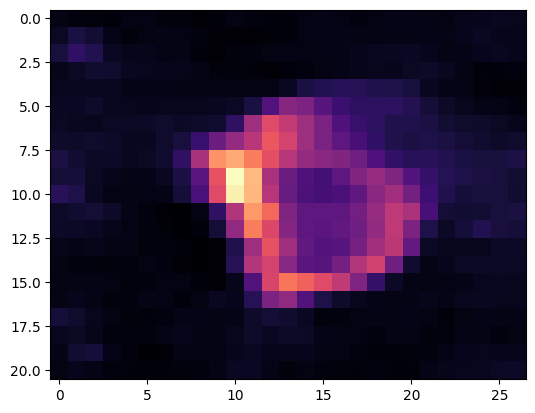

In [4]:
data = tifffile.imread('data/single_cell.tif')

plt.imshow(data.std(axis=0), cmap='magma');

## Plot

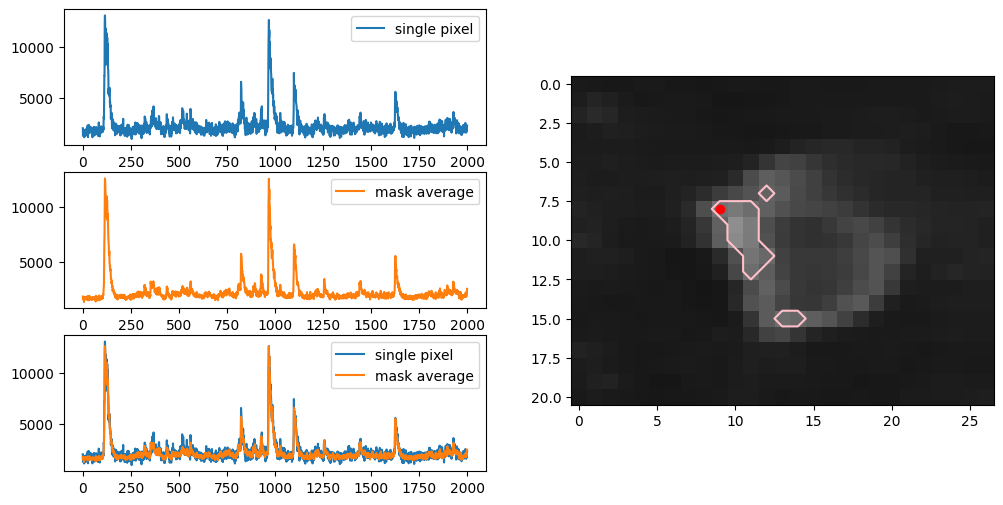

In [5]:
projection = np.std(data, axis=0)
threshold_val = np.mean(projection) + 3.*np.std(projection)
mask = projection > threshold_val
traces1 = data[:, mask]
pixel = 1

plt.figure(figsize=(12, 6))
plt.subplot(3, 2, 1)
plt.plot(data[:, mask][:, pixel], label='single pixel', );
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(np.nan)
plt.plot(np.median(data[:, mask][:, :], axis=1), label='mask average');
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(data[:, mask][:, pixel], label='single pixel');
plt.plot(np.median(data[:, mask][:, :], axis=1), label='mask average');
plt.legend();

plt.subplot(1, 2, 2)
plt.imshow(projection, cmap='gray', vmin=0, vmax=projection.max() * 1.8);
plt.contour(mask, colors='pink');
y, x = np.where(mask)
plt.scatter(x[pixel], y[pixel], color='red');